## CNN 성능 높이기
- 가장 대표적인 쉬운 두가지 방법으로 더 많은 레이어 쌓기와 이미지 보강(Image Augmentation)이 있다. 
- CNN 더 나아가 Deep Learning의 역사는 더 깊은 신경망을 쌓기 위한 노력이라고 할 수 있다. 딥러닝에서 네트워크 구조를 깊게 쌓는 것이 가능해진 후 CNN에서는 Convolution layer가 중첩된 더 깊은 구조가 계속해서 생겨났고 성능이 크게 개선되었다.
- 여기서는 VGGNet의 스타일로 구성한 CNN을 사용해서 Fashion MNIST 데이터를 분류하는 모델을 정의해 봤다. VGG는 단순한 구조이면서도 성능이 괜찮기 때문에 지금도 이미지의 특징 추출을 위한 네트워크에서 많이 사용되고 있다.

## 더 많은 레이어 쌓기 : VGGNet CNN for Fashion MNIST Dataset

## 한글 폰트 설치

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255
test_X = test_X / 255

print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [3]:
# 이미지 라벨 번호를 카테고리로 맵핑하는 딕셔너리 생성
nums = [0,1,2,3,4,5,6,7,8,9]
categories = ['티셔츠/상의', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '운동화', '가방', '부츠']

label_dict = {}
for num, category in zip(nums, categories):
    label_dict[num] = category

print(label_dict)

{0: '티셔츠/상의', 1: '바지', 2: '스웨터', 3: '드레스', 4: '코트', 5: '샌들', 6: '셔츠', 7: '운동화', 8: '가방', 9: '부츠'}


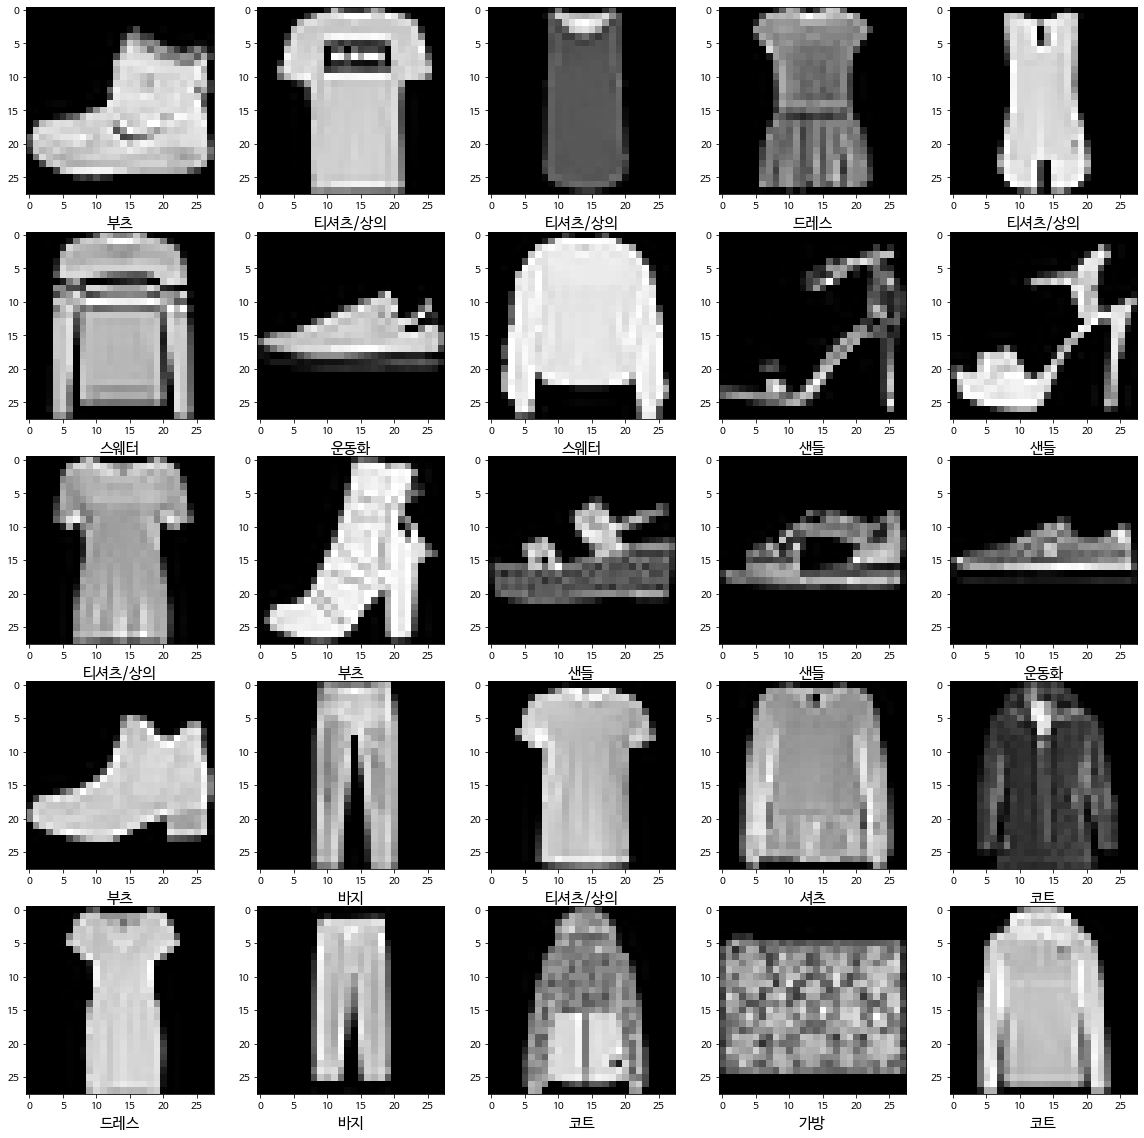

In [4]:
plt.figure(figsize=(20, 20))
for c in range(25):
    plt.subplot(5,5, c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    plt.xlabel(label_dict[train_Y[c]], size=15)

plt.show()

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                        

In [6]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 21s 9ms/step - loss: 0.5890 - accuracy: 0.7837 - val_loss: 0.3382 - val_accuracy: 0.8715
Epoch 2/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3743 - accuracy: 0.8644 - val_loss: 0.3175 - val_accuracy: 0.8802
Epoch 3/25
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3288 - accuracy: 0.8816 - val_loss: 0.2481 - val_accuracy: 0.9087
Epoch 4/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3048 - accuracy: 0.8902 - val_loss: 0.2337 - val_accuracy: 0.9147
Epoch 5/25
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2903 - accuracy: 0.8950 - val_loss: 0.2376 - val_accuracy: 0.9137
Epoch 6/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2806 - accuracy: 0.8995 - val_loss: 0.2232 - val_accuracy: 0.9162
Epoch 7/25
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2674 - accuracy: 0.9045 - val_loss: 0.2503 - val_ac

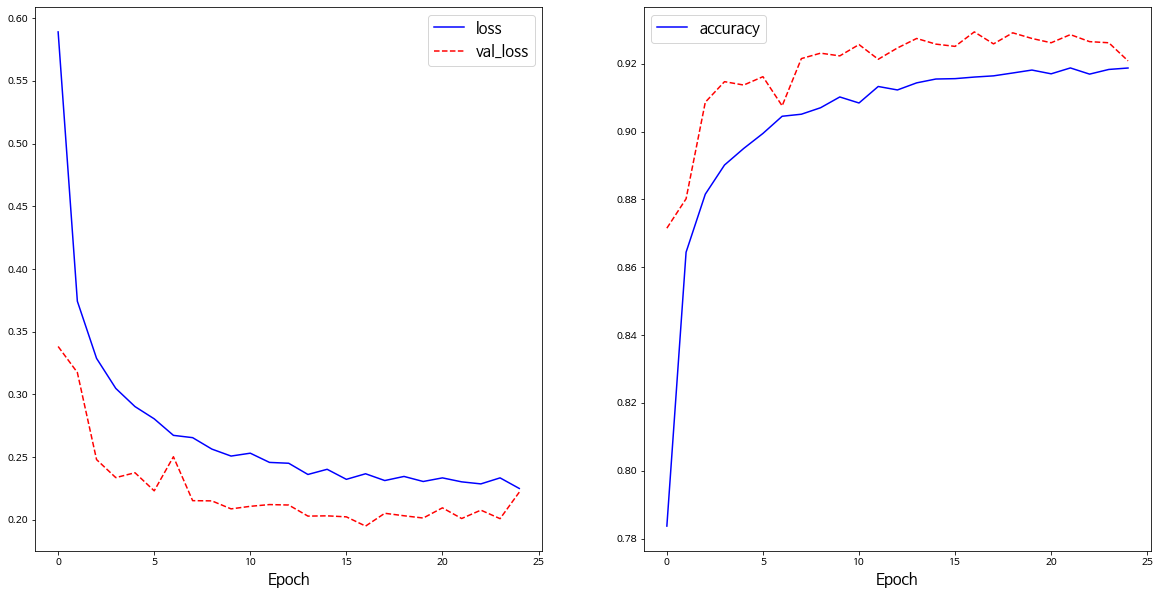

In [10]:
## train data와 test data의 loss와 accuracy 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch', size=15)

plt.legend(fontsize=15)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--')
plt.xlabel('Epoch', size=15)
plt.legend(fontsize=15)

plt.show()